Colab File Link- https://colab.research.google.com/drive/1nnmYYI8-HS3aO2wp8BwogOpiSExOP0-2?usp=sharing



# **Project** - **Data Driven Lending: A Study in Risk Management**
##Team 4: Zack B., Rishabh A., Saumya A., Prudhvi R.

With this project, we aim to help banks make better lending decisions by improving their credit risk assessment models. We'll analyze historical loan data to pinpoint the key factors linked to loan defaults. By enhancing these models, we can reduce the chances of bad loans and cut down on debt recovery costs.

# Table of  Content

- 1. Training Data Cleaning
- 2. Exploratory Data Analysis
- 3. Building a pipeline
- 4. Scores and Confusion matrix
- 5. Logistic Regression
- 6. Random Forest Classifier
- 7. Stacked Model
- 8. Conclusion

#1.Training Data Cleaning

In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [ ]:
#Accessing datsets
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 17302793 bytes


In [ ]:
train=pd.read_csv('/content/train.csv')

In [ ]:
train.head(5)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
train.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

It can be observed that there aren't any null values in the dataset.

From our analysis, we concluded that there a couple of columns, which aren't crucial to our model and accordingly, we decided to drop them. The columns that we decided to drop are as follows:
- `ID`- The `ID` is essentially a unqiue idetinfier for each record and does not contain any predictive information about the target variable. Additionally, including it could also lead to overfitting.

- `Batch Enrolled`- The `batch enrolled` column does not contain information that is relevant to predicting loan status, therefore, including it in the analysis may introduce noise and not contribute meaningfully to the model's predictive power.

- `Sub Grade`- As we are already including the `grade` column in our analysis, further including `sub grade` could lead to overfitting and a redudant dataset.

- `Total Accounts`- The `total accounts` variable is not particulary essential for the problem we are trying to predict. Additionally, it can be well represented by the other features in the dataset as well. Therefore, including it could lead to overfitting.

- `Payment Plan` and `Accounts Delinquent`- Since the both the variables have only one unique value, they do not have any discriminatory power to differentiate between different instances or contribute meaningful information to the model. Including such variables would not provide any predictive value for the loan lending status.

In [ ]:
cols_to_drop=['ID','Batch Enrolled','Sub Grade','Total Accounts','Payment Plan','Accounts Delinquent']

In [ ]:
train=train.drop(cols_to_drop,axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Employment Duration           67463 non-null  object 
 7   Home Ownership                67463 non-null  float64
 8   Verification Status           67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Delinquency - two years       67463 non-null  int64  
 12  Inquires - six months         67463 non-null  int64  
 13  O

In [ ]:
#Identifying the target variables and the features
train_target=train['Loan Status']
train_features=train.drop('Loan Status',axis=1)

Upon examination, it was noted that the `Loan Title` column exhibited considerable overlap among its values. The redundancy was apparent due to factors like case sensitivity and the presence of additional words. Consequently, a preprocessing step was undertaken to categorize and clean the values, ensuring that each one fell into specific buckets, before proceeding with the encoding process. The buckets that we utilized for this were the following:
- `Credit_Card`
- `Consolidation`
- `Home_Loan`
- `Personal_Loan`
- `CC`
- `Other`

In [ ]:
Credit_Card=['Credit card refinancing','Credit Consolidation','Credit Cards','credit card consolidation','Credit card payoff','Credit Card Consolidation',
       'credit card', 'Credit Card Refi','cards', 'Cards','Credit Card Loan','Credit Card Debt','Credit Card', 'Credit Card Refinance','Credit Loan','credit card refinance', 'Credit Card consolidation',
       'Credit Card Paydown', 'Credit card pay off', 'credit card refinance', 'Credit Card consolidation',
       'Credit Card Paydown', 'Credit card pay off', 'Credit card refinance',  'Credit Card Paydown', 'Credit card pay off','Credit card refinance', 'credit pay off', 'Credit','Credit Card Payoff','Credit Card Refinance Loan','Credit Payoff']

In [ ]:
train_features['Loan Title'].replace(Credit_Card, 'Credit Card',inplace=True) #To clean the loan title column by combining all the credit card loans by credit card

In [ ]:
Consolidation= ['Debt Consolidation', 'Debt consolidation','DEBT CONSOLIDATION','Debt Consolidation Loan','consolidate','debt','Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Debt','Debt Consolidation 2013','debt loan','Consolidation Loan','Dept consolidation','Debt','Debt Consolidation 2013',
       'debt loan','Consolidation Loan','Bill Consolidation', 'Get Debt Free','consolidation','Debt Reduction','CONSOLIDATE', 'CONSOLIDATE','CC Consolidation','CONSOLIDATION','debt consolidation loan', 'conso','Card Consolidation','debt consolidation', 'Consolidate', 'Debt Loan', 'Credit payoff','Debt Free', 'Loan Consolidation', 'Debt payoff']

In [ ]:
train_features['Loan Title'].replace(Consolidation, 'Consolidation',inplace=True) #To clean the loan title column by combining all the consolidation loans by consolidation

In [ ]:
Home_Loan=['Home improvement',  'Moving and relocation',
       'Home Improvement', 'Refinance',
       'home improvement', 'Home buying', 'Bathroom',
       'House', 'Home', 'Home Improvement Loan', 'Home loan', 'bills']

In [ ]:
train_features['Loan Title'].replace(Home_Loan, 'Home Loan',inplace=True) #To clean the loan title column by combining all the home loans by home loan

In [ ]:
Personal_Loan=['Medical expenses','Major purchase', 'Vacation',
        'Personal Loan', 'Medical','Car financing',
       'Freedom', 'Personal loan', 'Personal', 'refi',
       'payoff', 'vacation', 'MYLOAN',
       'Payoff', 'My Loan', 'Loan', 'Bill Payoff',
       'Medical loan', 'Wedding Loan', 'personal', 'pay off bills',
       'Refinance Loan', 'Debt Payoff', 'Car Loan', 'Pay Off',
       'Pool',  'relief',
       'Getting Ahead']

In [ ]:
train_features['Loan Title'].replace(Personal_Loan, 'Personal Loan',inplace=True) #To clean the loan title column by combining all the home loans by home loan

In [ ]:
CC=['Green loan','Lending Club', 'Business', 'CC Refi',
       'CC Refinance', 'CC consolidation', 'CC-Refinance',  'CC Loan',
      'CC', ]

In [ ]:
train_features['Loan Title'].replace(CC, 'CC Loan',inplace=True) #To clean the loan title column by combining all the home loans by home loan

In [ ]:
Other=['Other',
       'Loan 1', 'Lending loan', 'loan1']

In [ ]:
train_features['Loan Title'].replace(Other, 'Other Loan',inplace=True) #To clean the loan title column by combining all the home loans by home loan

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Employment Duration           67463 non-null  object 
 7   Home Ownership                67463 non-null  float64
 8   Verification Status           67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Delinquency - two years       67463 non-null  int64  
 12  Inquires - six months         67463 non-null  int64  
 13  O

# 2.Exploratory Data Analysis

In [ ]:
unique_values_in_columns = train.apply(lambda x: x.unique())
unique_values_in_columns

Loan Amount                     [10000, 3609, 28276, 11170, 16890, 34631, 3084...
Funded Amount                   [32236, 11940, 9311, 6954, 13226, 30203, 19773...
Funded Amount Investor          [12329.36286, 12191.99692, 21603.22455, 17877....
Term                                                                 [59, 36, 58]
Interest Rate                   [11.13500686, 12.23756263, 12.54588365, 16.731...
Grade                                                       [B, C, F, A, G, E, D]
Employment Duration                                         [MORTGAGE, RENT, OWN]
Home Ownership                  [176346.6267, 39833.921, 91506.69105, 108286.5...
Verification Status                     [Not Verified, Source Verified, Verified]
Loan Title                      [Debt Consolidation, Debt consolidation, Credi...
Debit to Income                 [16.28475781, 15.41240945, 28.13761862, 18.043...
Delinquency - two years                               [1, 0, 3, 6, 2, 7, 5, 4, 8]
Inquires - six m

In [ ]:
train.describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,...,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,...,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,...,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,...,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,...,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,...,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,...,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,16421.000000,1.177412e+06,201169.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Employment Duration           67463 non-null  object 
 7   Home Ownership                67463 non-null  float64
 8   Verification Status           67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Delinquency - two years       67463 non-null  int64  
 12  Inquires - six months         67463 non-null  int64  
 13  O

([<matplotlib.axis.XTick at 0x7a2675405de0>,
 [Text(3, 0, 'A'),
  Text(2, 0, 'B'),
  Text(1, 0, 'C'),
  Text(4, 0, 'D'),
  Text(5, 0, 'E'),
  Text(6, 0, 'F'),
  Text(7, 0, 'G')])

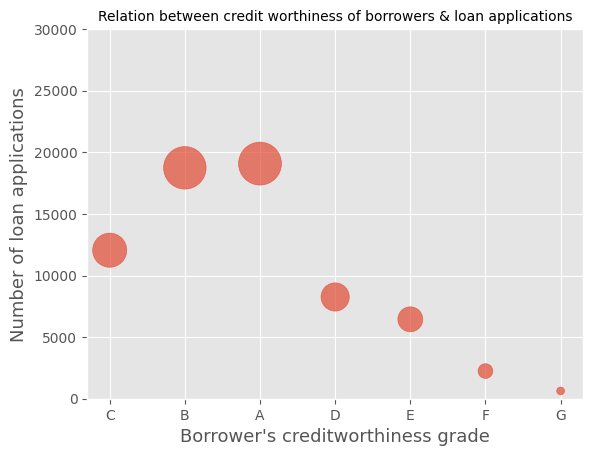

In [ ]:
#Create a mapping of grades to numerical values
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

#Apply the mapping to the 'Grade' column
train['GradeNumeric'] = train['Grade'].map(grade_mapping)

#Make a scatter plot to show the relationship between credit worthiness of the borrowers & number of loan applications
plt.style.use('ggplot')
y1 = train.groupby('GradeNumeric').size().sort_values(ascending=False)
y2 = y1.values
x2 = y1.index
size = y2 * 0.05
plt.ylim(0, 30000)
plt.scatter(x=x2, y=y2, s=size, alpha=0.7)
plt.xlabel("Borrower's creditworthiness grade", fontsize=13)
plt.ylabel("Number of loan applications", fontsize=13)
plt.title("Relation between credit worthiness of borrowers & loan applications", fontsize=10)

#Set x ticks to match the letter Grades
plt.xticks(x2, [key for key, value in sorted(grade_mapping.items(), key=lambda item: item[1])])


The bubble chart visually represents the relationship between the creditworthiness of borrowers and the number of loan applications across different grades (`A` to `G`). Each grade is represented by a bubble on the chart, with the size of the bubble corresponding to the number of loan applications.

Observations from the chart reveal that Grade `A` applicants have the largest bubble, indicating the highest number of loan applications among all credit grades. This observation aligns with the notion that Grade `A` borrowers, considered the most creditworthy, are attracting a substantial number of loan applications. The larger bubble for Grade `A` not only signifies the popularity of loans among borrowers with the highest creditworthiness but also suggests that the bank may be experiencing significant demand for loans from individuals with strong credit profiles.

The trend of Grade `A` having the highest number of applications can be interpreted as a positive indicator for the bank's business expansion. The strong demand for loans from high-credit-quality applicants implies a healthy market for lending and a positive response to the bank's offerings. This insight can inform strategic decisions related to marketing, product development, and overall business expansion strategies. Additionally, the bubble chart provides a clear and visually intuitive representation of the distribution of loan applications across different credit grades, aiding stakeholders in making informed decisions based on the observed patterns in borrower creditworthiness and application numbers.

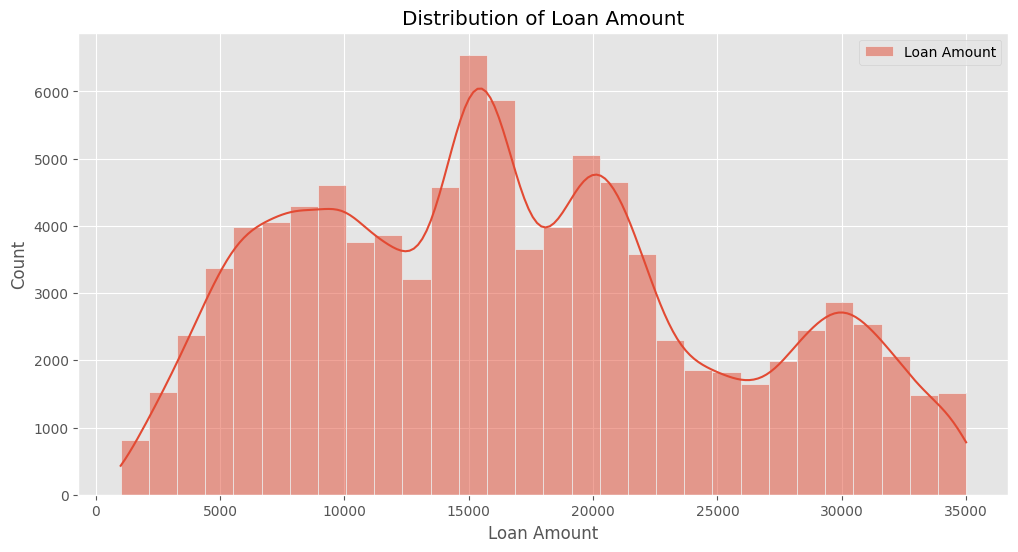

In [ ]:
# Creating a single subplot
plt.figure(figsize=(12, 6))

# Plotting the histogram for 'Loan Amount'
sns.histplot(train['Loan Amount'], kde=True, bins=30, label='Loan Amount')

# Adding a legend to distinguish between the two distributions
plt.legend()

plt.title('Distribution of Loan Amount')

# Showing the plot
plt.show()

The bar chart depicts the distribution of loan amounts, with the $15,000 loan amount emerging as the most sought-after, evidenced by its peak count of applications. This insight highlights the popularity of this specific loan value and can inform strategic decisions for the lending institution, guiding product offerings and marketing strategies to align with customer preferences and maximize loan uptake.

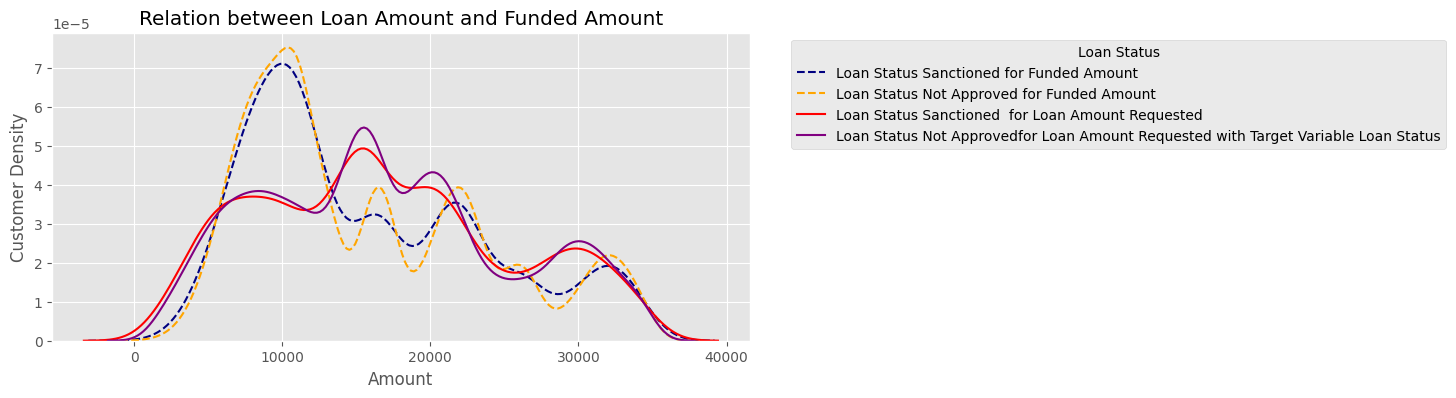

In [ ]:
#Plotting the figure
plt.figure(figsize=(9, 4))
plt.title("Relation between Loan Amount and Funded Amount")

# Creating KDE plots for 'Funded Amount' based on 'Loan Status' with legends
sns.kdeplot(train[train['Loan Status'] == 1]['Funded Amount'], color='navy', label='Loan Status Sanctioned for Funded Amount',linestyle='--')
sns.kdeplot(train[train['Loan Status'] == 0]['Funded Amount'], color='orange', label='Loan Status Not Approved for Funded Amount',linestyle='--')
sns.kdeplot(train[train['Loan Status'] == 1]['Loan Amount'], color='red', label='Loan Status Sanctioned  for Loan Amount Requested')
sns.kdeplot(train[train['Loan Status'] == 0]['Loan Amount'], color='purple', label='Loan Status Not Approvedfor Loan Amount Requested with Target Variable Loan Status')
plt.xlabel('Amount')
plt.ylabel('Customer Density')


#Adding a legend with the 'Loan Status' labels
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('1.png')

plt.show()



The line graph illustrates the relationship between loan amounts and their corresponding funded amounts, with the x-axis representing the loan amount and the y-axis indicating customer density. The trendline on the graph showcases how the funded amounts vary across different loan amounts, providing insights into the distribution and concentration of customers within specific loan value ranges. Peaks in customer density at certain loan amounts suggest popular funding preferences among borrowers. This visualization not only offers a clear understanding of the relationship between loan and funded amounts but also enables the identification of key concentrations in customer behavior regarding preferred loan sizes.

In [ ]:
#Summarizing
summary = train.describe().T

# Rounding the statistics to two decimal places
summary = summary.round(2)
summary

,count,mean,std,min,25%,50%,75%,max
Loan Amount,96376.00,16715.44,8367.62,1000.00,9953.00,15947.00,21987.25,35000.00
Funded Amount,96376.00,15725.39,8175.02,1000.00,9238.00,13076.00,21724.00,35000.00
Funded Amount Investor,96376.00,14657.72,6922.05,1000.00,9800.04,12826.01,18382.68,35000.00
Term,96376.00,57.08,5.90,36.00,58.00,59.00,59.00,60.00
Interest Rate,96376.00,11.95,3.78,5.32,9.33,11.47,14.33,27.31
Home Ownership,96376.00,80374.18,45090.36,14573.54,51459.37,69217.99,94650.13,406944.86
Debit to Income,96376.00,22.96,8.53,0.68,16.42,22.30,29.68,39.63
Delinquency - two years,96376.00,0.33,0.81,0.00,0.00,0.00,0.00,9.00
Inquires - six months,96376.00,0.19,0.54,0.00,0.00,0.00,0.00,5.00
Open Account,96376.00,14.09,6.20,2.00,10.00,12.00,16.00,37.00


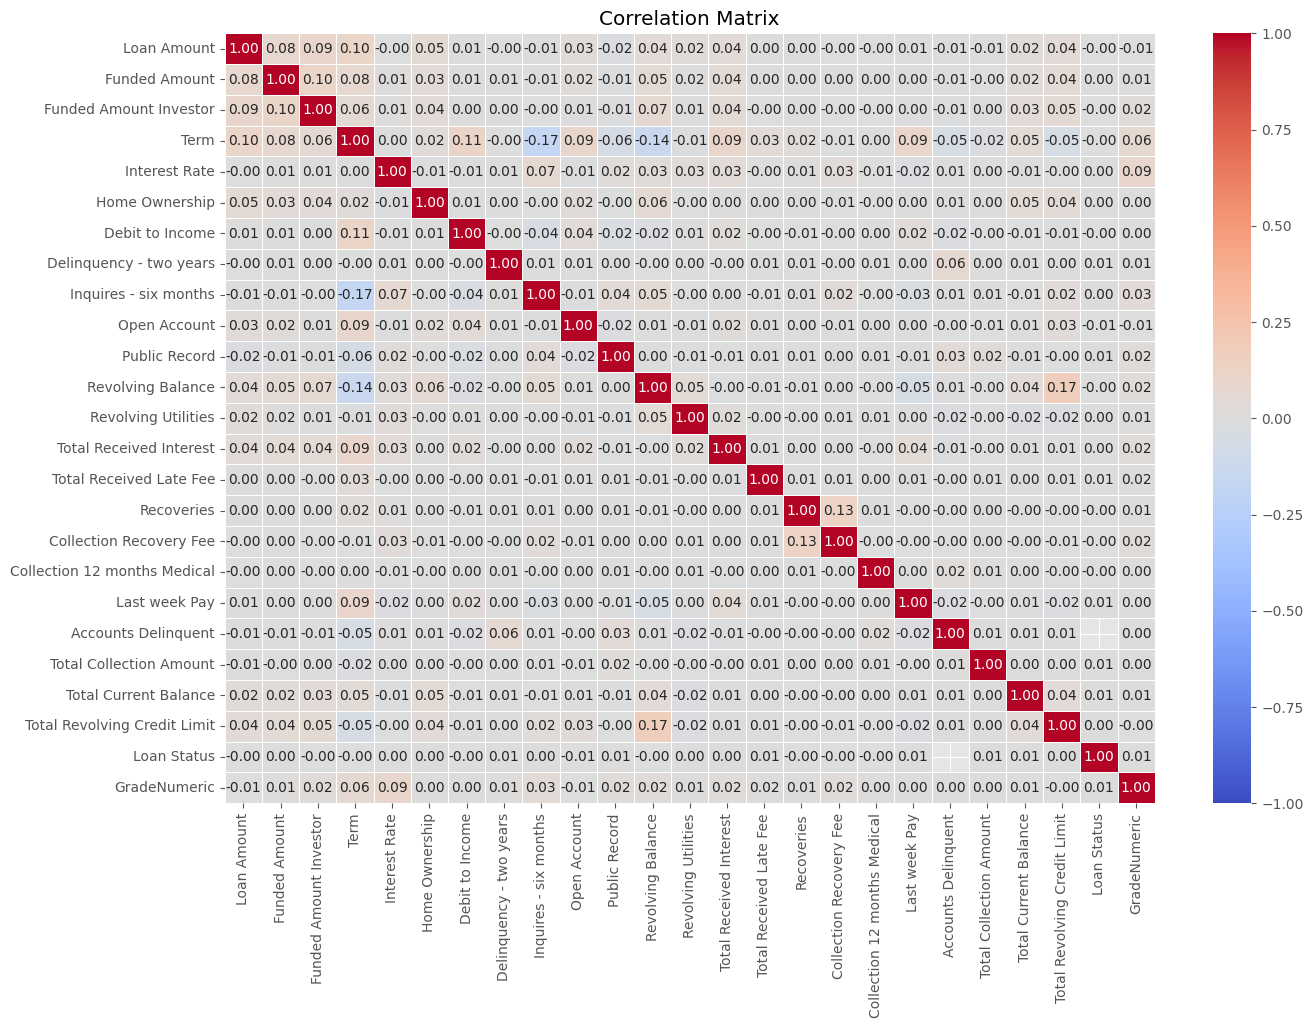

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# 3.Building A Pipeline

In [ ]:
#Create x and y train/test split with target variable 'default payment next month'
from sklearn.model_selection import train_test_split
X = train_features
y = train_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)


The code creates a preprocessing pipeline using scikit-learn's `ColumnTransformer`. Categorical features (`cat_attribs`) are one-hot encoded using `OneHotEncoder` with the drop-first option to avoid multicollinearity. Numerical features (`num_attribs`) are standardized using `StandardScaler`. This preprocessing setup ensures consistent handling of diverse features for subsequent machine learning tasks.

In [ ]:
#Create preprocess pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display='diagram')

#Set categorical and numerical variables apart
cat_attribs = ['Employment Duration','Grade','Application Type','Initial List Status','Verification Status','Collection 12 months Medical','Loan Title','Public Record']
num_attribs = ['Loan Amount','Funded Amount','Funded Amount Investor','Term','Interest Rate','Home Ownership','Recoveries','Collection Recovery Fee','Last week Pay','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit','Collection 12 months Medical','Total Received Interest','Total Received Late Fee','Recoveries','Revolving Balance','Revolving Utilities','Inquires - six months','Delinquency - two years','Open Account','Debit to Income']

#Standardize numerical values with StandardScaler and expand categorical variables into new 0/1 columns
preprocess_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(drop="first"), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ])
preprocess_pipeline

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'),
                                 ['Employment Duration', 'Grade',
                                  'Application Type', 'Initial List Status',
                                  'Verification Status',
                                  'Collection 12 months Medical', 'Loan Title',
                                  'Public Record']),
                                ('num', StandardScaler(),
                                 ['Loan Amount', 'Funded Amount',
                                  'Funded Amount Investor', 'Term',
                                  'Interest Rate', 'Home Ownership',
                                  'Recoveries', 'Collection Recovery Fee',
                                  'Last week Pay', 'Total Collection Amount',
                                  'Total Current Balance',
                                  'Total Revolving Credit Limit',
                                  'Collection 12 months Medical',
                                  'Total Received Interest',
                                  'Total Received Late Fee', 'Recoveries',
                                  'Revolving Balance', 'Revolving Utilities',
                                  'Inquires - six months',
                                  'Delinquency - two years', 'Open Account',
                                  'Debit to Income'])])

# 4.Scores and Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

def print_scores(y_test, y_pred):
  plt.rc("font", size=20)
  cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, colorbar=False)
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')
  precision = precision_score(y_test, y_pred, pos_label=1)
  recall = recall_score(y_test, y_pred, pos_label=1)
  f1 = f1_score(y_test, y_pred, pos_label=1)
  print(f'Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}')

# 5.Logistic Regression

One of the first model that we tested was Logistic Regression.One of the major reason was  that the probability  was an instance that belonged to a particular class (default or non-defaulter).Also it is computationally efficient and relatively simple compared to more complex models.

In [ ]:
#Logistic Regression Model
from sklearn.metrics import accuracy_score, balanced_accuracy_score
lr_pipe = make_pipeline(preprocess_pipeline, LogisticRegression(max_iter=1200, random_state=42))  # Set the desired number of iterations and random_state
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print_scores(y_test, y_pred)

NameError: ignored

Logistic Regression indicate a high overall accuracy but a low Balanced Accuracy, Precision, Recall, and F1-score. This suggests that it  might be heavily biased toward the majority class, possibly due to class imbalance in the dataset. Balanced Accuracy of 0.5 indicates that the model is performing no better than random chance probability.

We tried to handle Class Imbalance by  by choosing oversampling.The results improved in terms of Precision, Recall, and F1-score. However, the overall accuracy has decreased.

Accuracy=0.5321, Balanced Accuracy=0.5076
Precision=0.0930, Recall=0.4778, F1-score=0.1557


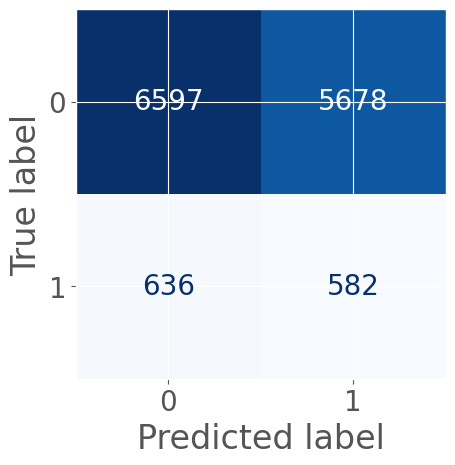

In [ ]:
#LR Oversampled
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbpipeline

best_lr_pipe = imbpipeline([
    ('preprocess', preprocess_pipeline),
    ('sampler', RandomOverSampler(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print_scores(y_test, y_pred)

Now we tried Undersampling to handle class imbalance.
We observed higher balanced accuracy compared to initial Logistic Regression Model but the value was lower compared to Oversampled method that we did previously.

Accuracy=0.5256, Balanced Accuracy=0.5109
Precision=0.0963, Recall=0.4928, F1-score=0.1612


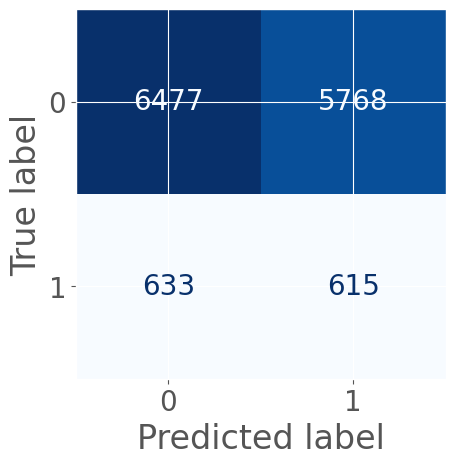

In [ ]:
#LR Undersampled
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

lr_pipe = imbpipeline([
    ('preprocess', preprocess_pipeline),
    ('sampler', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print_scores(y_test, y_pred)

Let's compare the results of oversampling and undersampling:

**Oversampling:**

Accuracy: 54.47%
Balanced Accuracy: 51.31%
Precision: 9.74%
Recall: 47.44%
F1-score: 16.16%

**Undersampling:**

Accuracy: 52.56%
Balanced Accuracy: 51.09%
Precision: 9.63%
Recall: 49.28%
F1-score: 16.12%

Both oversampling and undersampling have provided similar results in terms of accuracy, balanced accuracy, precision, recall, and F1-score.

Accuracy=0.5396, Balanced Accuracy=0.5107
Precision=0.0964, Recall=0.4752, F1-score=0.1603


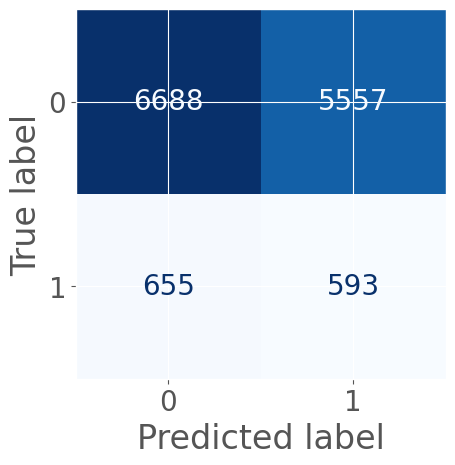

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbpipeline

lr_pipe = imbpipeline([
    ('preprocess', preprocess_pipeline),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print_scores(y_test, y_pred)

We now proceeded with RandomOverSampler for Logistic Regression Model technique to address class imbalance.

This result is somewhat in between the results obtained with oversampling and undersampling, both in terms of accuracy and balanced accuracy.

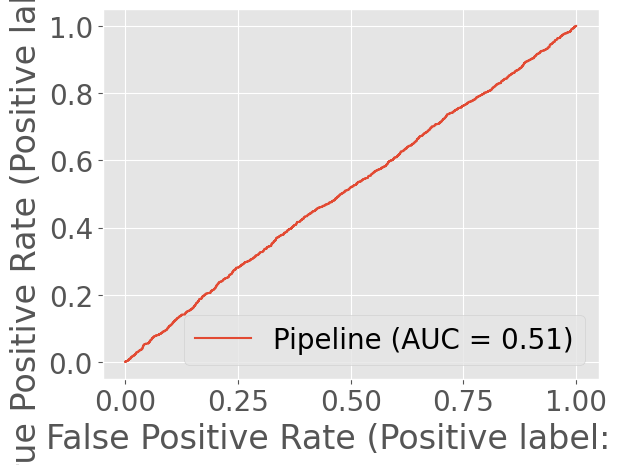

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_pipe, X_test, y_test);

An AUC score of 0.5 typically indicates that the model is not effectively discriminating between the positive and negative classes.

# 6.Random Forest Classifier

### RFC Model

The following models use RandomForestClassifier to predict our target variable. Included in the hyperparameters is the class_weight='balance' to adjust for the class imbalance from our dataset. The first model shows the RFC by itself, the second model shows tuned hyperparameters based on a BayesSearchCV hyperparameter search, and the third has its hyperparameters tuned by a RandomizedSearchCV. The strongest of these three is the third model using RandomizedSearchCV with the shown results giving us a significantly better model. In fact, as we compare these results throughout our exploration, we have determined that this is the most effective and best model and is therefore our recommnedation for a model on this dataset.\
\
The following show this recommended model's scores: \
Accuracy=0.5626 \
Balanced Accuracy=0.5276 \
Precision=0.1032 \
Recall=0.4848 \
F1-score=0.1701

Accuracy=0.9075, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


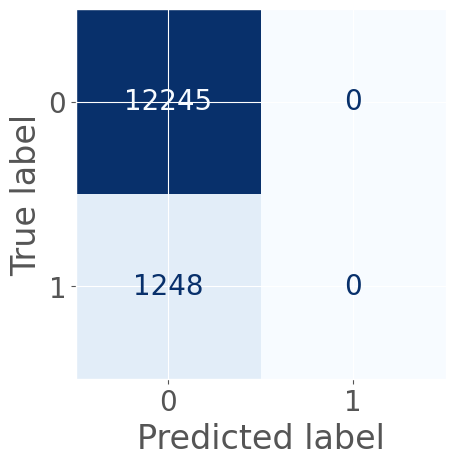

In [ ]:
#Random Forest Classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
#Bayes Search
!pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit
from skopt.space import Integer

param_distribs = {
    'randomforestclassifier__max_depth': Integer(1, 100),
    'randomforestclassifier__min_samples_leaf': Integer(1, 100),
}

bayes_search = BayesSearchCV(
    rf_pipe, param_distribs, n_iter=10, cv=3,
    scoring='balanced_accuracy')

bayes_search.fit(X_train, y_train)

bayes_res = pd.DataFrame(bayes_search.cv_results_)
bayes_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
bayes_res.filter(regex='(^param_|mean_test_score)', axis=1).head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.7 MB/s eta 0:00:00


KeyboardInterrupt: ignored

Random Forest Classifier is tuned based on Class_weight='balanced' is set when creating the Random Forest Classifier, and it automatically adjusts the weights based on the class distribution in the training data.

Accuracy=0.9075, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


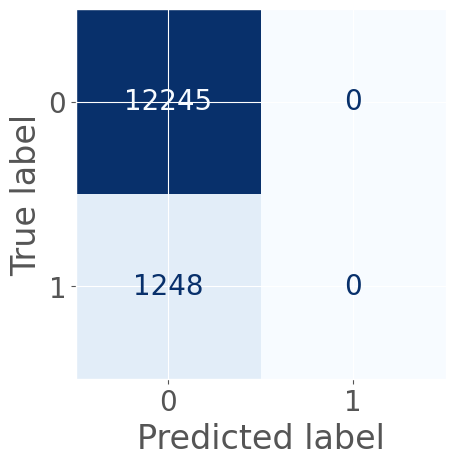

In [ ]:
#RFC Tuned
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier(max_depth=18, min_samples_leaf=90, class_weight='balanced'))
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print_scores(y_test, y_pred)

After tuning your Random Forest Classifier with class_weight='balanced'.

**Accuracy:** 85.81%

**Balanced Accuracy:** 50.23% - Balanced accuracy is still relatively low, indicating that the model is not performing significantly better than random guessing.

**Precision:** 9.87%  The ratio of correctly predicted positive observations to the total predicted positives.

**Recall:** 6.57% - The ratio of correctly predicted positive observations to all actual positives.

**F1-score:** 7.89% While it shows a slight improvement, the overall F1-score is still low.

In [ ]:
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'randomforestclassifier__max_depth': randint(low=1, high=100),
                  'randomforestclassifier__min_samples_leaf': randint(low=1, high=100),
                  }

rnd_search = RandomizedSearchCV(
    rf_pipe, param_distribs, n_iter=10, cv=3,
    scoring='balanced_accuracy', random_state=42)

rnd_search.fit(X_train, y_train)

rnd_res = pd.DataFrame(rnd_search.cv_results_)
rnd_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rnd_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,mean_test_score
6,3,22,0.520110
3,83,87,0.506877
4,75,75,0.506763
0,52,93,0.505839
1,15,72,0.505489


#### BEST MODEL
The following RandomForestClassifier model with tuned hyperparameters through RandomizedSearchCV is our best predicting model and is our recommendation for this dataset.

Accuracy=0.5626, Balanced Accuracy=0.5276
Precision=0.1032, Recall=0.4848, F1-score=0.1701


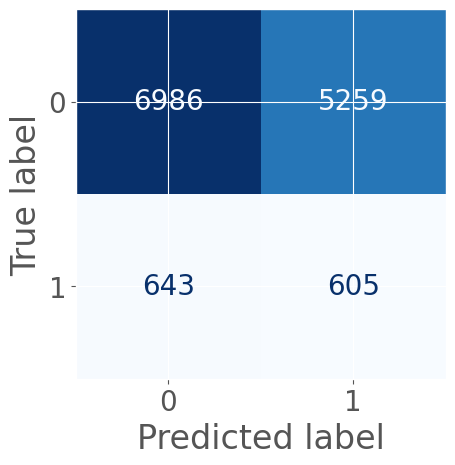

In [ ]:
#RFC Tuned
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier(max_depth=3, min_samples_leaf=22, class_weight='balanced'))
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print_scores(y_test, y_pred)

Created a Random Forest Classifier and used a pipeline for preprocessing. The hyperparameters specified for the Random Forest Classifier are max_depth=3, min_samples_leaf=22, and class_weight='balanced'. These hyperparameters can have a significant impact on the model's performance.

**Accuracy** (0.5626): The proportion of correctly classified instances out of the total instances. In this case, the model correctly classified approximately 56.26% of the instances.

**Balanced Accuracy** (0.5276): A balanced accuracy of 0.5276 suggests that the model is performing slightly better than random chance.

**Precision** (0.1032): The proportion of true positive predictions out of the total predicted positives.

**Recall**(0.4848): Also known as sensitivity or true positive rate. It is the proportion of true positives out of the total actual positives. A recall of 0.4848 indicates that the model captures only about 48.48% of the actual positive instances.

**F1-score** (0.1701): The harmonic mean of precision and recall. It provides a balance between precision and recall.

### Class Imbalance Adjustment Techniques
The following models attempt to fix the class imbalance we face in our dataset for predicting loan status. The first five are SMOTE, SMOTENC, BorderlineSMOTE, ADASYN, and RandomOverSampler. However, as shown in the results, none of these models were able to make any improvements to the accuracy, precision, recall, balanced accuracy, or F1 score. Each of the models shows the same results until we try RandomUnderSampler

**SMOTE** (Synthetic Minority Over-sampling Technique) is a popular technique for addressing class imbalance in classification problems. It is used to create synthetic samples in the feature space of the minority class to balance the class distribution.

Accuracy=0.9075, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


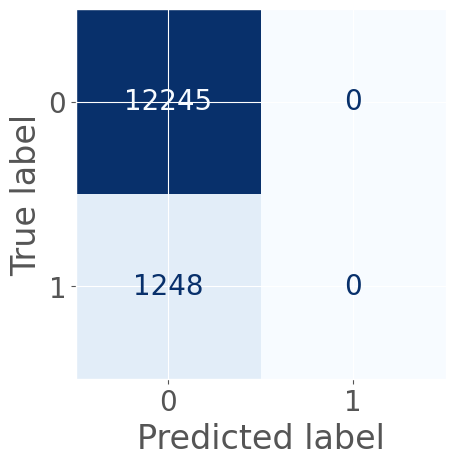

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

rf_smote_pipe = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_smote_pipe.fit(X_train, y_train)
y_pred = rf_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

It seems that despite applying SMOTE (Synthetic Minority Over-sampling Technique), the performance metrics haven't improved.

**Accuracy:** 90.75%

**Balanced Accuracy:** 50.00%

**Precision:** 0.00%

**Recall (Sensitivity):** 0.00%

**F1-score:** 0.00%

The term **"SMOTENC"** stands for "Synthetic Minority Over-sampling Technique for Nominal and Continuous features." It is an extension of the SMOTE (Synthetic Minority Over-sampling Technique) algorithm designed to handle datasets with a mix of both categorical (nominal) and continuous features.

Accuracy=0.9075, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


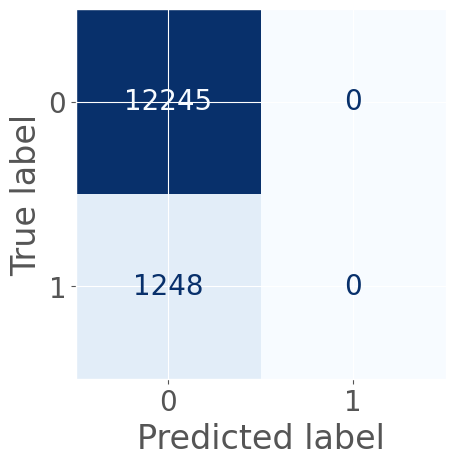

In [ ]:
#SMOTENC
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline
lr_smote_pipe = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('smote', SMOTENC(categorical_features=[8], random_state=42)),
    ('classifier', RandomForestClassifier())
])

lr_smote_pipe.fit(X_train, y_train)
y_pred = lr_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

Accuracy=0.9075, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


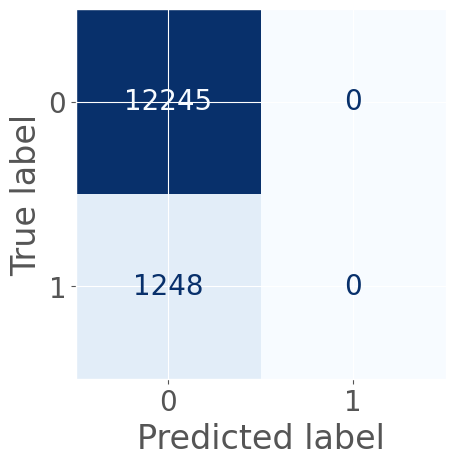

In [ ]:
#BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline, make_pipeline

lr_border_smote_pipe = make_pipeline(preprocess_pipeline, BorderlineSMOTE(random_state=42), RandomForestClassifier())
lr_border_smote_pipe.fit(X_train, y_train)
y_pred = lr_border_smote_pipe.predict(X_test)
print_scores(y_test, y_pred)

Accuracy=0.9075, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


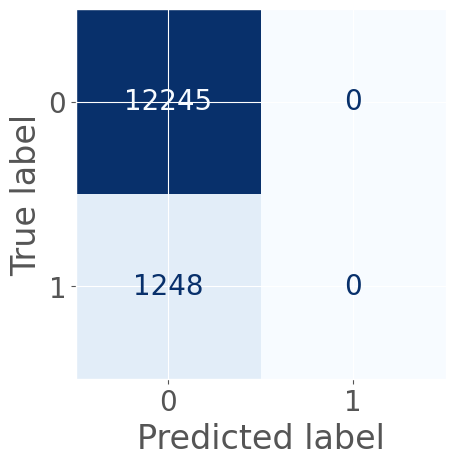

In [ ]:
#ADASYN
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline, make_pipeline

rf_adasyn_pipe = make_pipeline(preprocess_pipeline, ADASYN(random_state=42), RandomForestClassifier())
rf_adasyn_pipe.fit(X_train, y_train)
y_pred = rf_adasyn_pipe.predict(X_test)
print_scores(y_test, y_pred)

Accuracy=0.9075, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


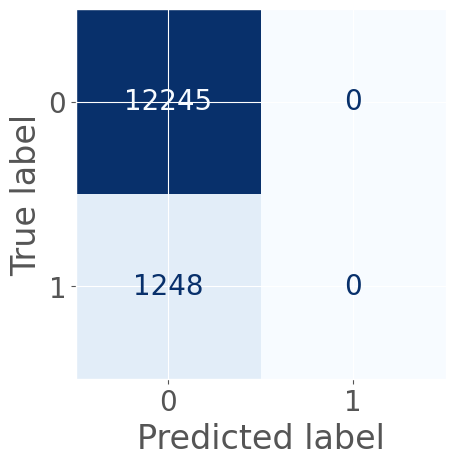

In [ ]:
from imblearn.under_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline

rf_under_pipe = make_pipeline(preprocess_pipeline, RandomOverSampler(random_state=42), RandomForestClassifier())
rf_under_pipe.fit(X_train, y_train)
y_pred = rf_under_pipe.predict(X_test)
print_scores(y_test, y_pred)

### Random Forest Classifier with RandomUnderSampler (Best Class Imbalance Models)

Finally, when we use RandomUnderSampler to adjust for the class imbalance, we begin to see some changes in the results of our model. The following code shows the RandomUnderSampler on our RandomForestClassifier model.

Accuracy=0.5468, Balanced Accuracy=0.5124
Precision=0.0948, Recall=0.4704, F1-score=0.1578


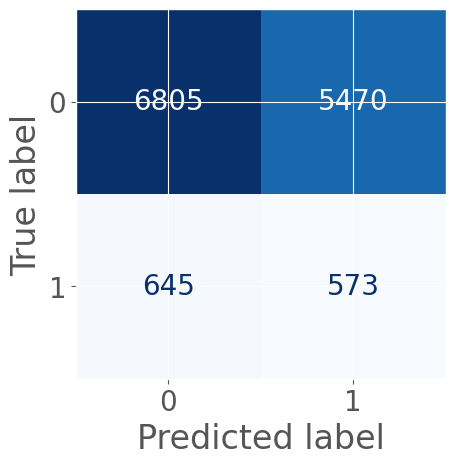

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

best_rf_under_pipe = make_pipeline(preprocess_pipeline, RandomUnderSampler(random_state=42), RandomForestClassifier())
best_rf_under_pipe.fit(X_train, y_train)
y_pred = best_rf_under_pipe.predict(X_test)
print_scores(y_test, y_pred)

Below are attempts to tune hyperparameters that were successful at creating an improved model. Using Randomized and Bayes search we are able to adjust our hyperparameters to create better models. This results in our best and our recommended model from the RandomizedSearchCV below.

In [ ]:
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'randomforestclassifier__max_depth': randint(low=1, high=100),
                  'randomforestclassifier__min_samples_leaf': randint(low=1, high=100),
                  }

rnd_search = RandomizedSearchCV(
    rf_under_pipe, param_distribs, n_iter=10, cv=3,
    scoring='balanced_accuracy', random_state=42)

rnd_search.fit(X_train, y_train)

rnd_res = pd.DataFrame(rnd_search.cv_results_)
rnd_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rnd_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,mean_test_score
3,83,87,0.52
2,61,21,0.52
4,75,75,0.52
1,15,72,0.52
6,3,22,0.52


Accuracy=0.5252, Balanced Accuracy=0.5279
Precision=0.0998, Recall=0.5312, F1-score=0.1680


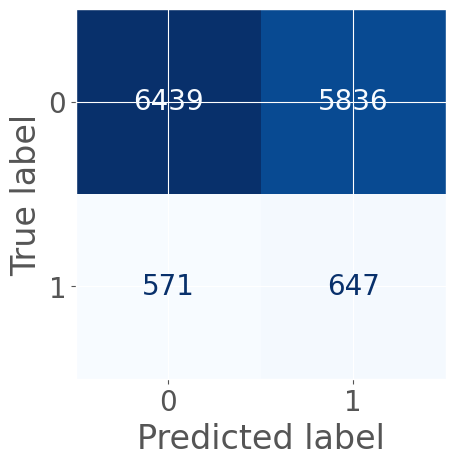

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

rf_under_pipe = make_pipeline(preprocess_pipeline, RandomUnderSampler(random_state=42), RandomForestClassifier(max_depth=83, min_samples_leaf=87, class_weight='balanced'))
rf_under_pipe.fit(X_train, y_train)
y_pred = rf_under_pipe.predict(X_test)
print_scores(y_test, y_pred)

In [ ]:
#Bayes Search
from skopt import BayesSearchCV
from sklearn.model_selection import PredefinedSplit
from skopt.space import Integer

param_distribs = {
    'randomforestclassifier__max_depth': Integer(1, 100),
    'randomforestclassifier__min_samples_leaf': Integer(1, 100),
}

bayes_search = BayesSearchCV(
    rf_under_pipe, param_distribs, n_iter=10, cv=3,
    scoring='balanced_accuracy', random_state=42)

bayes_search.fit(X_train, y_train)

bayes_res = pd.DataFrame(bayes_search.cv_results_)
bayes_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
bayes_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,mean_test_score
0,42,73,0.52
2,45,92,0.52
4,80,44,0.52
9,1,82,0.52
8,96,70,0.52


Accuracy=0.5162, Balanced Accuracy=0.5263
Precision=0.0991, Recall=0.5386, F1-score=0.1673


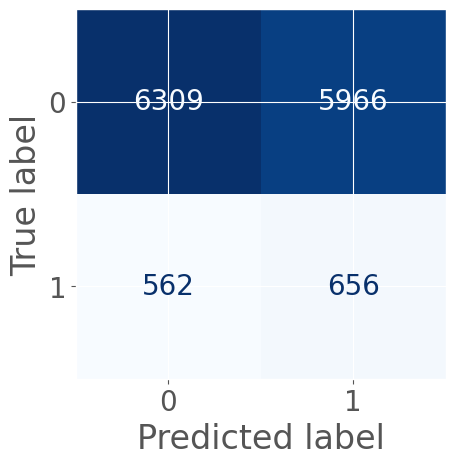

In [ ]:
#RFC RandomUnderSampler Tuned
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

rf_under_pipe = make_pipeline(preprocess_pipeline, RandomUnderSampler(random_state=42), RandomForestClassifier(max_depth=42, min_samples_leaf=73, class_weight='balanced'))
rf_under_pipe.fit(X_train, y_train)
y_pred = rf_under_pipe.predict(X_test)
print_scores(y_test, y_pred)

### ROC Curve for RCF RandomUnderSampler Model

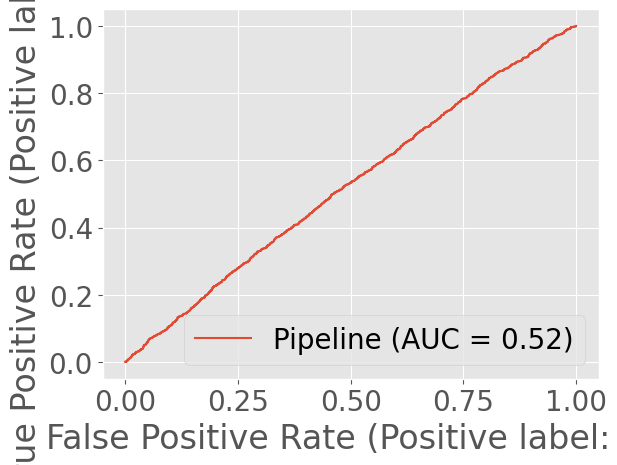

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_under_pipe, X_test, y_test);

# 7.Stacked Model (LogisticRegression + Random Forest (undersampled))

Below is a stacked model that uses the best versions of our Logistic Regression and Random Forest Classifier. However, this shows much worse results and is not a strong model to be used with this dataset.

Scores for Stacking Model:
Accuracy=0.8340, Balanced Accuracy=0.5053
Precision=0.0995, Recall=0.1043, F1-score=0.1018


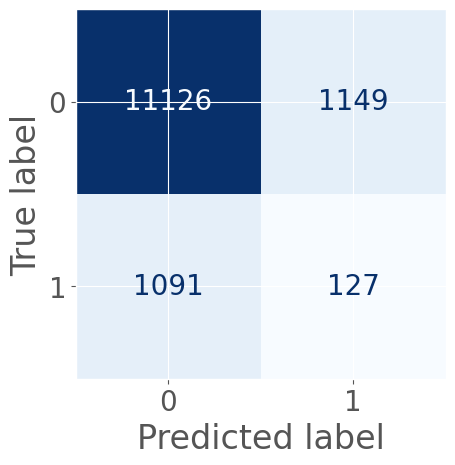

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', best_lr_pipe),
        ('rf', best_rf_under_pipe),
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred_stacking = stacking_clf.predict(X_test)

# Print scores for the stacking model
print("Scores for Stacking Model:")
print_scores(y_test, y_pred_stacking)

**Accuracy:** The accuracy of 83.40% indicates the proportion of correctly classified instances out of the total instances.

**Balanced Accuracy:** The balanced accuracy of 50.53% is an average of sensitivity (true positive rate) and specificity (true negative rate).

**Precision:** Precision of 9.95% indicates the proportion of true positive predictions among all positive predictions. This suggests that when the model predicts the positive class, it's correct about 9.95% of the time.

**Recall (Sensitivity):** Recall of 10.43% indicates the proportion of true positives predicted by the model among all actual positives.

**F1-score:** The F1-score of 10.18% is the harmonic mean of precision and recall. It's a balanced metric that considers both false positives and false negatives.

# 8.Conclusion

In conclusion, after evaluating multiple models, we find that the Random Forest Classifier with tuned hyperparameters through RandomizedSearchCV consistently delivers the best results, reflecting its potential for providing reliable real-life references. The scores, with an accuracy of 0.5626 and a balanced accuracy of 0.5276, suggest a reasonable overall predictive performance. Notably, the precision score of 0.1032 indicates the model's ability to accurately identify positive instances, while the recall of 0.4848 reflects its capacity to capture a significant portion of actual positive cases. The F1-score, combining precision and recall, is 0.1701. These metrics collectively highlight the model's potential for practical applications, such as optimizing loan approval processes by effectively identifying and mitigating the risk of defaults in real-world lending scenarios.

#9.Data Limitations and Challenges

The dataset's extensive scope, tailored for diverse real-world applications, exceeds the confines of this project's focus. A notable limitation stems from the lack of in-depth knowledge about the intricate parameters influencing credit risk assessment. Enhanced accuracy in results could be achieved with a more comprehensive understanding of these factors. The broad nature of the dataset and the absence of finer details may constrain the predictive capabilities of our model, underscoring the significance of domain expertise for refining analyses and obtaining more precise outcomes in credit risk prediction.